# Project: Flight Price Prediction

## Objective: 

The objective of this project is to analyse an booking flight dataset then build a machine learning model to predict the price of a flight.
The dataset comes from a website called “Ease My Trip" which is an online platform where potential passengers can book flight tickets.

Summary:
 - Data Exploration
 - Data Preprocessing
 - Model Training
 - Model Evaluation
 - Hyperparameter Tuning

## Data Exploration

In [148]:
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [149]:
# dropping any null values and checking if they are dropped
# it's okay to drop the null values here because we have a large dataset
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Uses value_counts() to see all the distinct values of a column
and assess how many categories we have for one-hot encoding later, so we can do regression later.

In [150]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [151]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [152]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [153]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [154]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [155]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

Looks like we can do one-hot encoding as we don't have too many categories.

## Data Preprocessing

In [156]:
# dropping the columns 'Unnamed: 0' and 'flight' as they won't help predict flight price
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

In [157]:
# turns the column 'class' into a binary feature to become numerical
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

# turns the column 'stops' into a factor to become numerical
df.stops = pd.factorize(df.stops)[0]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [158]:
# one-hot encodes the rest of the columms so now the dataframe only contains numerical values and that we can do regression later

df = df.join(pd.get_dummies(df.airline, dtype = int, prefix = 'airline', drop_first = True)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, dtype = int, prefix = 'source', drop_first = True)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, dtype = int,  prefix = 'dest', drop_first = True)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, dtype = int,  prefix = 'arrival', drop_first = True)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, dtype = int,  prefix = 'departure', drop_first = True)).drop('departure_time', axis=1)
df

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


The dataframe is now ready to be trained. 

##  Training the Regression Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [73]:
X, y = df.drop('price', axis=1), df.price

# splits the data into train and test data, 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
# no need to scale the data as random forest regressors is not sensitive to the scale of the features
reg = RandomForestRegressor(n_jobs=-1) #uses max number of processors to speed up the process
reg.fit(X_train, y_train) 

RandomForestRegressor(n_jobs=-1)

In [76]:
# testing the model
reg.score(X_test, y_test)

0.9855372330990054

The R^2 score is pretty good, roughly 98.55% of the time, we'll predict the flight price accurately. 
Because of this, we can now go ahead with evaluating the model.

## Model Evaluation

In [160]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred = reg.predict(X_test) 

print('R-squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.9855372330990054
Mean Absolute Error: 1068.8827749852392
Mean Squared Error: 7470104.1498043295
Root Mean Squared Error: 2733.149126887212


The metrics are also performing well, note that the metrics are large but that's because the currency for flight price is in Indian rupees. 

In [164]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

As we can see, the flight price is large  as it is in rupees.

Text(0.5, 1.0, 'Prediction vs Actual Price')

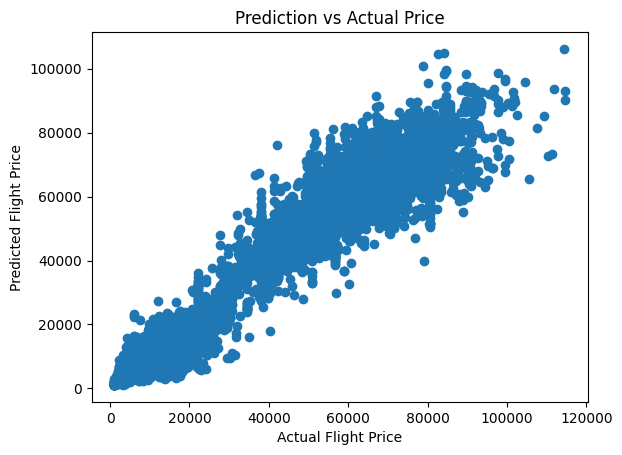

In [163]:
plt.scatter(y_test, y_pred) # compares the actual flight price from y_test to the predicted flight price from y-pred
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

The model is performing quite well as it is resembling a positive linear relationship. 

In [165]:
# looks at the level of importance of predictors from most to least importance
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8789588668540433),
 ('duration', 0.05834533848563108),
 ('days_left', 0.01875259853990725),
 ('airline_Air_India', 0.0053931089715752445),
 ('airline_Vistara', 0.004542551896927597),
 ('source_Delhi', 0.0037480809764223006),
 ('dest_Delhi', 0.0033951938717737802),
 ('source_Mumbai', 0.002284515430272242),
 ('dest_Mumbai', 0.0019067162666335483),
 ('source_Kolkata', 0.0018553724539908387),
 ('dest_Kolkata', 0.0017856055587136884),
 ('stops', 0.001730027090128851),
 ('dest_Hyderabad', 0.001618438999537636),
 ('arrival_Evening', 0.0015757565153528494),
 ('source_Hyderabad', 0.0012620768925653467),
 ('dest_Bangalore', 0.001178487028854145),
 ('arrival_Night', 0.0011416851385029816),
 ('source_Bangalore', 0.0011213128975462803),
 ('departure_Evening', 0.0010146144464379275),
 ('arrival_Afternoon', 0.001007195435090378),
 ('dest_Chennai', 0.0008990677649711915),
 ('source_Chennai', 0.0008740652261813046),
 ('departure_Morning', 0.0008572090955079192),
 ('departure_Early_Morning'

The predictors 'class', 'duration' and 'days_left' are important in the random forest regression model.
'Class' is the most important and it makes sense because it's either economy or business, and business class costs higher.

<BarContainer object of 5 artists>

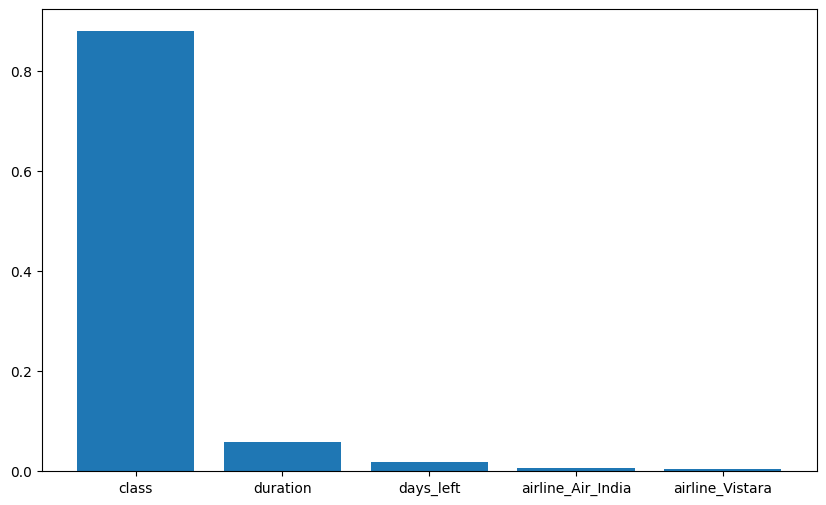

In [166]:
plt.figure(figsize = (10,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

Just a plot to visualise the importances.

## Hyperparameter Tuning

The model seems to be performing well, but we will still try and do hyperparameter tuning to see if it can still be improved.

We will basically try possible combination of hyperparameters to find the best possible combination that increases the accuracy of predictions.

In [ ]:
# Implements the Grid Search CV but I won't recommend running this because this will take so long 
# as it needs to try out every possible combination of hyperparamaters

# from sklearn.model_selection import GridSearchCV

# reg = RandomForestRegressor(n_jobs=-1)

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2 ,4],
#     'max_features': ['auto', 'sqrt']
# }

# grid_search = GridSearchCV(reg, param_grid, cv =5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_

Hence, we'll do the Randomized Search CV instead where we'll provide a range to our hyperparameters and it will search it randomly.
In return, this shortens the time it will take to find the best combination than Grid Search CV.

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, 
                                   n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose = 2, random_state = 10, n_jobs=-1)
random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_param

In [168]:
best_regressor.score(X_test, y_test)

0.9864485522861062

(Model with hyperparameter tuning score): 0.9864485522861062 > 0.9855372330990054 (Model without hyperparameter tuning score) 

New model is performing slightly better.

We can go ahead with evaluating this new model.

In [170]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test) 

print('R-squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.9864485522861062
Mean Absolute Error: 1085.4685229854683
Mean Squared Error: 6999402.430834557
Root Mean Squared Error: 2645.6383786970123


The new model performs better than the old model.

 - R-squared is higher so it's able to predict flight prices more accurately.
 - Mean squared error is lower meaning better predictions.
 - Root mean squared error is lower meaing better predictions.

BUT the mean absolute error is slightly higher, but because the flight price is in Inidan rupees so if converted into dollars, then this difference would not be that large.

So all in all, the new model after performing hyperparameter tuning is able to predict flight prices better.

Text(0.5, 1.0, 'Prediction vs Actual Price')

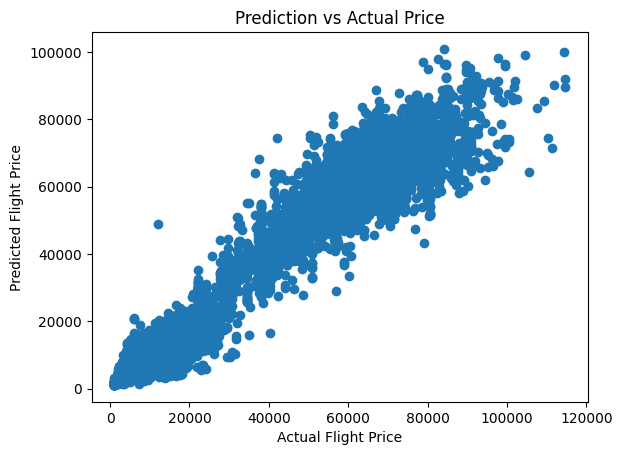

In [172]:
plt.scatter(y_test, y_pred) # compares the actual flight price from y_test to the predicted flight price from y-pred
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

The points are slightly more compact than that of the old model.